# Project 12 - Chatbot development using NLTK

In [1]:
# importing Natural Language Toolkit 
import nltk

In [2]:
# loading punctuation sets
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentence Tokenizer

In [3]:
from nltk.tokenize import sent_tokenize

text = """Hello Mr. John, Hope you are doing good.
By the way I have a plan to visit your house in the next week of the month"""

token_sent = sent_tokenize(text)
print(token_sent)

['Hello Mr. John, Hope you are doing good.', 'By the way I have a plan to visit your house in the next week of the month']


### Word Tokenizer

In [4]:
from nltk.tokenize import word_tokenize

token_word = word_tokenize(text)
print(token_word)

['Hello', 'Mr.', 'John', ',', 'Hope', 'you', 'are', 'doing', 'good', '.', 'By', 'the', 'way', 'I', 'have', 'a', 'plan', 'to', 'visit', 'your', 'house', 'in', 'the', 'next', 'week', 'of', 'the', 'month']


### Frequency distribution

In [5]:
from nltk.probability import FreqDist

freq_dist = FreqDist(token_word)
print(freq_dist)

<FreqDist with 26 samples and 28 outcomes>


In [6]:
print(freq_dist.most_common())

[('the', 3), ('Hello', 1), ('Mr.', 1), ('John', 1), (',', 1), ('Hope', 1), ('you', 1), ('are', 1), ('doing', 1), ('good', 1), ('.', 1), ('By', 1), ('way', 1), ('I', 1), ('have', 1), ('a', 1), ('plan', 1), ('to', 1), ('visit', 1), ('your', 1), ('house', 1), ('in', 1), ('next', 1), ('week', 1), ('of', 1), ('month', 1)]


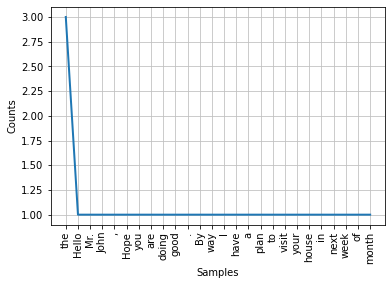

In [7]:
import matplotlib.pyplot as plt

freq_dist.plot(27,cumulative=False)
plt.show()

### Stop Words

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing Stop Words

In [10]:
filtered_sent = [w for w in token_word if w not in stop_words]

print(f'Token words before removing the stop words\n\n{token_word} -> {len(token_word)}')
print(f'\n\nToken words after removing the stop words\n\n{filtered_sent} -> {len(filtered_sent)}')

Token words before removing the stop words

['Hello', 'Mr.', 'John', ',', 'Hope', 'you', 'are', 'doing', 'good', '.', 'By', 'the', 'way', 'I', 'have', 'a', 'plan', 'to', 'visit', 'your', 'house', 'in', 'the', 'next', 'week', 'of', 'the', 'month'] -> 28


Token words after removing the stop words

['Hello', 'Mr.', 'John', ',', 'Hope', 'good', '.', 'By', 'way', 'I', 'plan', 'visit', 'house', 'next', 'week', 'month'] -> 16


### Stemming

In [11]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in filtered_sent]
print(f'Filtered tokens \n\n{filtered_sent}')
print(f'Stemmed tokens \n\n{stemmed_words}')

Filtered tokens 

['Hello', 'Mr.', 'John', ',', 'Hope', 'good', '.', 'By', 'way', 'I', 'plan', 'visit', 'house', 'next', 'week', 'month']
Stemmed tokens 

['hello', 'mr.', 'john', ',', 'hope', 'good', '.', 'By', 'way', 'I', 'plan', 'visit', 'hous', 'next', 'week', 'month']


### Lemmatization

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.stem import WordNetLemmatizer

# example code to give demo on lemmatization vs Stemming
lem = WordNetLemmatizer()
stem = PorterStemmer()
example_word = 'flying'

print(f'Lemmatized word : {lem.lemmatize(example_word,"v")}')
print(f'\nStemmed word : {stem.stem(example_word)}')

Lemmatized word : fly

Stemmed word : fli


# Chatbot Development using nltk

In [14]:
import io
import random
import string
import warnings
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

In [15]:
# preping nltk package
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True)

# nltk.download('punkt')   # run only once, if downloaded already, no need to run
# nltk.download('wordnet') # run only once

True

### Reading in the corpus
##### Here we are using a sample content from Wikipedia page for chatbot  as our corpus, saved in the 'chatbot.txt' file.

In [16]:
file = open('chatbot.txt','r',errors='ignore')
raw  = file.read()
raw  = raw.lower()

### Tokenising the raw content

In [17]:
token_sentence = nltk.sent_tokenize(raw)
token_words    = nltk.word_tokenize(raw)

### Preprocessing

In [18]:
lemmer = nltk.stem.WordNetLemmatizer()
# wordnet - nltk paackage containing sematically oriented english dictionary
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

### Keyword matching and greeting response

In [19]:
# defining some greeting keywords to identify the users greeting input
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up", "hey")
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "glad to meet you"]

def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

### Generating bot response

In [20]:
def response(user_response):
    robo_response = ''
    token_sentence.append(user_response)
    
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf    = TfidfVec.fit_transform(token_sentence)
    
    vals     = cosine_similarity(tfidf[-1], tfidf)
    idx      = vals.argsort()[0][-2]
    
    flat     = vals.flatten()
    flat.sort()
    
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response = robo_response + "I am sorry!, I don't understand you"
        return robo_response
    else:
        robo_response = robo_response + token_sentence[idx]
        return robo_response

In [21]:
# executing the functions

flag = True
print("Bot: My name is ISHA, do you have any query about chatbot")

while(flag==True):
    user_response = input()
    user_response = user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag = False
            print("ISHA: You are welcome")
        else:
            if(greeting(user_response)!=None):
                print('ISHA: '+greeting(user_response))
            else:
                print("ISHA: ", end="")
                print(response(user_response))
                token_sentence.remove(user_response)
    else:
        flag = False
        print("ISHA: Bye! take care...")
        

Bot: My name is ISHA, do you have any query about chatbot
hi
ISHA: hi there
hello
ISHA: hi there
hi
ISHA: hello
hey
ISHA: hi
chatbot
ISHA: design
the chatbot design is the process that defines the interaction between the user and the chatbot.the chatbot designer will define the chatbot personality, the questions that will be asked to the users, and the overall interaction.it can be viewed as a subset of the conversational design.
api
ISHA: I am sorry!, I don't understand you
bye
ISHA: Bye! take care...
